In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
class ChiSquareDistribution:
    def __init__(self, df):
        self.df = df

    def pdf(self, x):
        coef = (1 / (2 ** (self.df / 2) * np.math.gamma(self.df / 2)))
        return coef * (x ** (self.df / 2 - 1)) * np.exp(-x / 2)

    def cdf(self, x):
        return np.array([self._cdf_single(val) for val in x])

    def _cdf_single(self, x):
        return np.sum([(x ** k * np.exp(-x / 2)) / (2 ** k * np.math.factorial(k)) for k in range(self.df)])

def plot_pdf(x_values, pdf1, pdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf1, label=label1, color='blue')
    plt.plot(x_values, pdf2, label=label2, color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_cdf(x_values, cdf1, cdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, cdf1, label=label1, color='blue')
    plt.plot(x_values, cdf2, label=label2, color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_comparison(x_values, pdf_scipy, pdf_custom, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf_scipy, label=label1, color='blue', linestyle='--')
    plt.plot(x_values, pdf_custom, label=label2, color='orange')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Parameters for two chi-square distributions (degrees of freedom)
df1 = 2
df2 = 5

# Generate x values
x_chi2 = np.linspace(0, 20, 1000)

# Calculate PDF and CDF using scipy
pdf_chi2_1_scipy = chi2.pdf(x_chi2, df1)
pdf_chi2_2_scipy = chi2.pdf(x_chi2, df2)
cdf_chi2_1_scipy = chi2.cdf(x_chi2, df1)
cdf_chi2_2_scipy = chi2.cdf(x_chi2, df2)

# Create instances of ChiSquareDistribution
chi2_dist_1 = ChiSquareDistribution(df1)
chi2_dist_2 = ChiSquareDistribution(df2)

# Calculate PDF and CDF using custom class
pdf_chi2_1_custom = np.array([chi2_dist_1.pdf(x) for x in x_chi2])
pdf_chi2_2_custom = np.array([chi2_dist_2.pdf(x) for x in x_chi2])

cdf_chi2_1_custom = chi2_dist_1.cdf(x_chi2)
cdf_chi2_2_custom = chi2_dist_2.cdf(x_chi2)

/tmp/ipykernel_1266927/1031906402.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coef = (1 / (2 ** (self.df / 2) * np.math.gamma(self.df / 2)))
/tmp/ipykernel_1266927/1031906402.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.sum([(x ** k * np.exp(-x / 2)) / (2 ** k * np.math.factorial(k)) for k in range(self.df)])


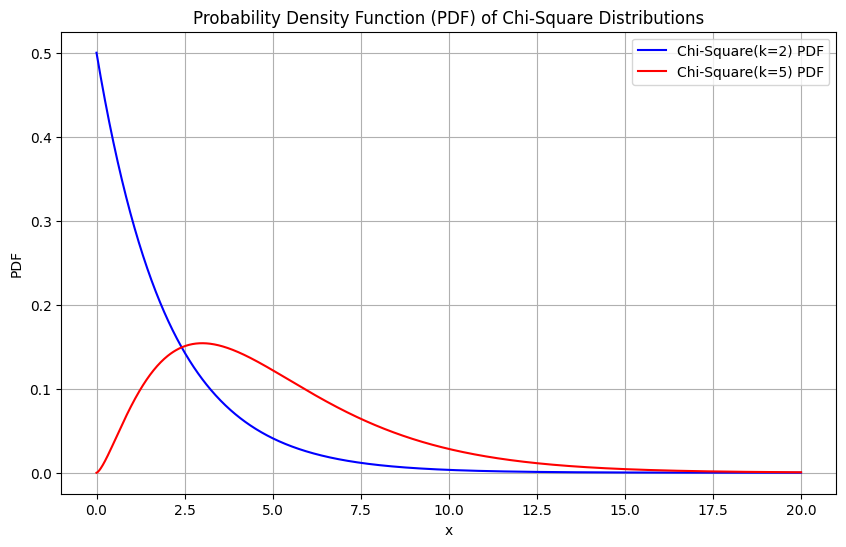

In [4]:
# Plot 1: PDF of Chi-Square Distributions (Original)
plot_pdf(x_chi2, pdf_chi2_1_scipy, pdf_chi2_2_scipy,
         label1=f'Chi-Square(k={df1}) PDF', 
         label2=f'Chi-Square(k={df2}) PDF',
         title='Probability Density Function (PDF) of Chi-Square Distributions')

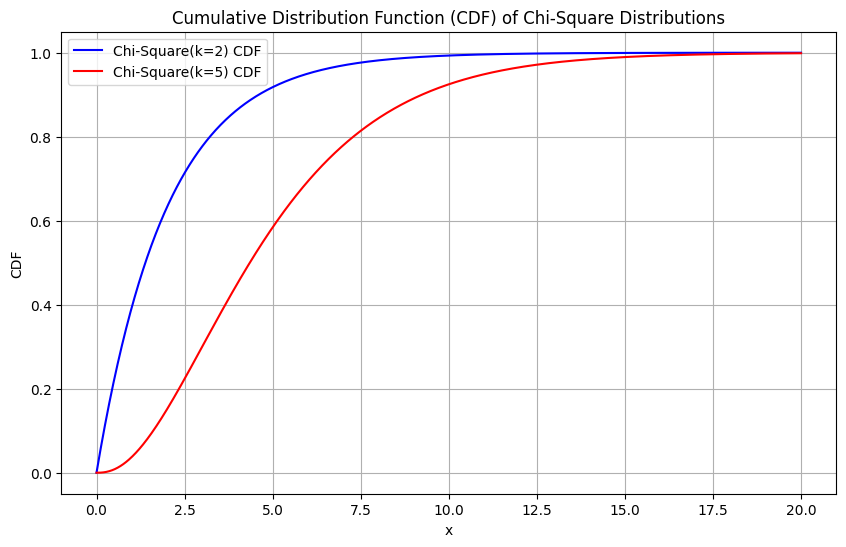

In [5]:
# Plot 2: CDF of Chi-Square Distributions (Original)
plot_cdf(x_chi2, cdf_chi2_1_scipy, cdf_chi2_2_scipy, 
         label1=f'Chi-Square(k={df1}) CDF', 
         label2=f'Chi-Square(k={df2}) CDF', 
         title='Cumulative Distribution Function (CDF) of Chi-Square Distributions')

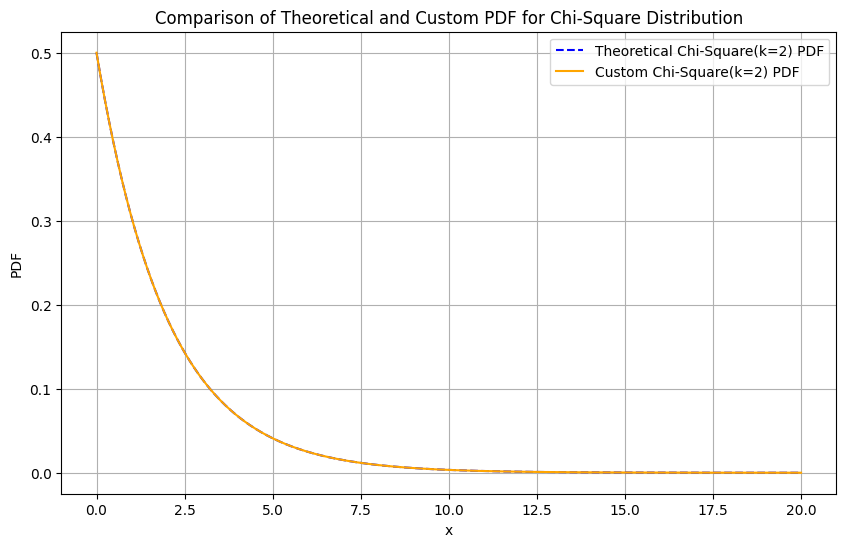

In [6]:
# Plot 3: Comparison of Theoretical and Custom PDFs
plot_comparison(x_chi2, pdf_chi2_1_scipy, pdf_chi2_1_custom, 
                label1=f'Theoretical Chi-Square(k={df1}) PDF', 
                label2=f'Custom Chi-Square(k={df1}) PDF', 
                title='Comparison of Theoretical and Custom PDF for Chi-Square Distribution')